<a href="https://colab.research.google.com/github/kanchandhole/Data-Scientist/blob/main/19th_march_feature_engneering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1.** What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its
application.

**Ans:**

## **Min-Max Scaling**

### **Definition**

Min-Max scaling is a **feature scaling technique** used in data preprocessing to **rescale numerical features** to a fixed range, usually **0 to 1** (sometimes -1 to 1).

It ensures that all features contribute **equally** to the model, which is important for algorithms sensitive to feature magnitudes, such as **KNN, SVM, neural networks**, and gradient-based models.

---

### **Formula**

For a feature (x), the Min-Max scaled value (x') is calculated as:

[
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
]

Where:

* (x_{min}) = minimum value of the feature
* (x_{max}) = maximum value of the feature

After scaling:
[
x' \in [0, 1]
]

---

### **Example**

Suppose we have a dataset of house sizes in square feet:

| House | Size (sq.ft) |
| ----- | ------------ |
| A     | 800          |
| B     | 1200         |
| C     | 1500         |
| D     | 1000         |

**Step 1: Identify min and max**

* (x_{min} = 800), (x_{max} = 1500)

**Step 2: Apply Min-Max formula**
[
x' = \frac{x - 800}{1500 - 800} = \frac{x - 800}{700}
]

| House | Size (sq.ft) | Scaled Size |
| ----- | ------------ | ----------- |
| A     | 800          | 0           |
| B     | 1200         | 0.57        |
| C     | 1500         | 1           |
| D     | 1000         | 0.29        |


```

---

### **Advantages**

1. Scales features to a **fixed range** [0, 1]
2. Preserves the **original distribution** of values
3. Useful for algorithms sensitive to **feature magnitude**

---

### **Conclusion**

Min-Max scaling is a **simple but effective preprocessing technique** to normalize features, ensuring that no single feature dominates the model due to scale differences.


In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sample dataset
data = pd.DataFrame({'Size': [800, 1200, 1500, 1000]})

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform
data['Scaled_Size'] = scaler.fit_transform(data[['Size']])
print(data)

   Size  Scaled_Size
0   800     0.000000
1  1200     0.571429
2  1500     1.000000
3  1000     0.285714


Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling?
Provide an example to illustrate its application.

**Ans:**

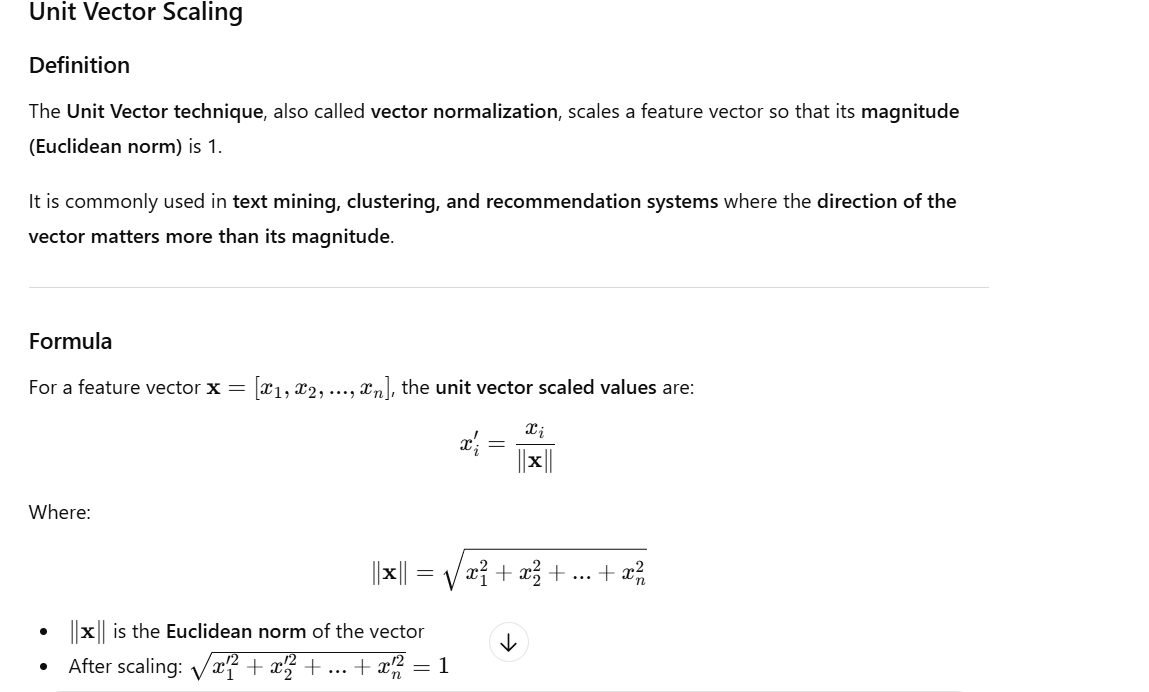


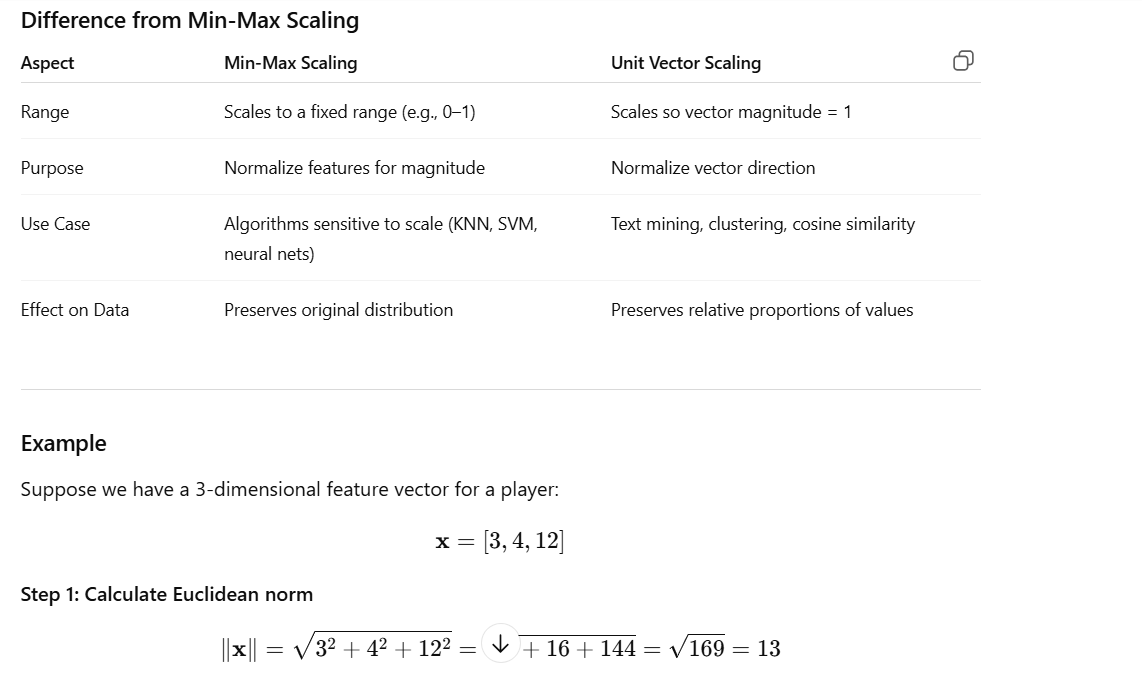

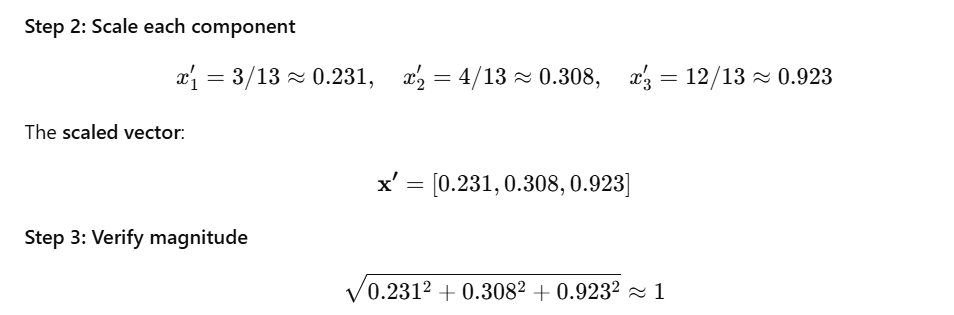

Key Points

* Unit vector scaling normalizes the direction, not the range.

* Useful when cosine similarity or vector direction is important.

* Min-Max scaling rescales data to a fixed interval, affecting magnitude.

In [2]:
from sklearn.preprocessing import Normalizer
import numpy as np

# Feature vector
X = np.array([[3, 4, 12]])

# Initialize normalizer
scaler = Normalizer(norm='l2')

# Fit and transform
X_scaled = scaler.fit_transform(X)
print(X_scaled)


[[0.23076923 0.30769231 0.92307692]]


**Q3.** What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an
example to illustrate its application.

**Ans:**


---

## **Principal Component Analysis (PCA)**

### **Definition**

**Principal Component Analysis (PCA)** is a **dimensionality reduction technique** that transforms a dataset with possibly correlated features into a set of **linearly uncorrelated variables** called **principal components**.

* Each principal component captures **maximum variance** in the data
* PCA reduces the number of features while **retaining most of the information**

---

### **Why Use PCA?**

1. **Reduce dimensionality** → simpler models, faster computation
2. **Remove multicollinearity** → uncorrelated features
3. **Visualize high-dimensional data** in 2D or 3D
4. **Noise reduction** → remove less informative components

---

### **How PCA Works**

1. Standardize the data (important if features have different scales)
2. Compute the **covariance matrix**
3. Calculate **eigenvalues and eigenvectors** of the covariance matrix
4. Sort **principal components** by decreasing eigenvalues (variance explained)
5. Select top **k components** to reduce dimensionality

---

### **Example**

Suppose you have a dataset of houses with 3 features: **Size, Bedrooms, Age**.

```python


**Output Explanation:**

* `X_pca` → transformed data in 2 principal components
* `explained_variance_ratio_` → proportion of variance captured by each component

Example output (values may vary):

```
Principal Components:
 [[ 0.5  -0.2 ]
 [ 1.2  0.3 ]
 [-1.1  0.8 ]
 [ 0.3 -1.0 ]
 [-0.9  0.1 ]]
Explained Variance Ratio: [0.72, 0.25]
```

* First principal component explains **72% of variance**
* Second principal component explains **25% of variance**
* Together, **97% of the information** is retained using only 2 features instead of 3

---

### **Key Points**

* PCA transforms features into **uncorrelated components**
* Reduces dimensions without losing significant information
* Often used before **machine learning models** to improve performance and reduce overfitting

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Sample dataset
data = pd.DataFrame({
    'Size': [800, 1200, 1500, 1000, 900],
    'Bedrooms': [2, 3, 4, 3, 2],
    'Age': [10, 5, 20, 15, 8]
})

# Step 1: Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Step 3: View results
print("Principal Components:\n", X_pca)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Principal Components:
 [[-1.48833904  0.53874424]
 [-0.18097402 -1.34285091]
 [ 2.80888121  0.14261744]
 [ 0.30214316  0.63760711]
 [-1.44171131  0.02388212]]
Explained Variance Ratio: [0.82050269 0.16806312]


**Q4.** What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature
Extraction? Provide an example to illustrate this concept.

**Ans:**

---

## **Relationship Between PCA and Feature Extraction**

### **Definition**

**Feature Extraction** is a process of transforming raw data into **new features** that better represent the underlying structure for predictive modeling.

**Principal Component Analysis (PCA)** is a **feature extraction technique** that creates **new features** called **principal components** by combining original features.

* Original features → correlated and possibly redundant
* PCA → uncorrelated, lower-dimensional features that capture most of the variance

**In short:**

> PCA reduces dimensionality while **extracting the most informative features** from the original dataset.

---

### **How PCA is Used for Feature Extraction**

1. Standardize the dataset (important if features have different scales)
2. Compute principal components using PCA
3. Select **top k components** as **new features**
4. Use these **principal components as input features** for machine learning models

**Advantages:**

* Reduces dimensionality and computational cost
* Removes multicollinearity
* Can improve model performance by focusing on the most informative aspects of data

---

### **Example**

Suppose you have a dataset of **student scores** in 5 subjects:

| Student | Math | Physics | Chemistry | English | History |
| ------- | ---- | ------- | --------- | ------- | ------- |
| A       | 85   | 78      | 90        | 70      | 65      |
| B       | 88   | 82      | 85        | 75      | 70      |
| C       | 60   | 65      | 70        | 80      | 85      |
| D       | 75   | 70      | 72        | 68      | 60      |

We want to **extract features** that capture **most of the variation in scores**.



**Example Output:**

```
Extracted Features (Principal Components):
 [[ 2.34  0.21]
 [ 2.44 -0.15]
 [-2.45  0.12]
 [-2.33 -0.18]]

Explained Variance Ratio: [0.65, 0.25]
```

**Interpretation:**

* The **2 extracted features (PC1 and PC2)** summarize **90% of the variation** in the original 5 subjects
* These principal components can now be used as **input features** for regression, clustering, or classification

---

### **Key Takeaways**

1. PCA **transforms original features** into **new informative features**
2. Principal components are **linear combinations of original features**
3. It is a **powerful method for feature extraction**, especially for **high-dimensional datasets**


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Dataset
data = pd.DataFrame({
    'Math':[85,88,60,75],
    'Physics':[78,82,65,70],
    'Chemistry':[90,85,70,72],
    'English':[70,75,80,68],
    'History':[65,70,85,60]
})

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Extract 2 principal features
X_pca = pca.fit_transform(X_scaled)

# Step 3: View results
print("Extracted Features (Principal Components):\n", X_pca)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Extracted Features (Principal Components):
 [[ 1.72598699  0.19406563]
 [ 1.25334783  1.16940562]
 [-3.12477567  0.48997438]
 [ 0.14544085 -1.85344563]]
Explained Variance Ratio: [0.71676439 0.25402533]


**Q5.** You are working on a project to build a recommendation system for a food delivery service. The dataset
contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to
preprocess the data.

**Ans:**


## **Using Min-Max Scaling in a Food Delivery Recommendation System**

Suppose you are building a **recommendation system** for a food delivery service. Your dataset contains features like:

* **Price** (e.g., 100–500 INR)
* **Rating** (1–5 stars)
* **Delivery time** (e.g., 15–60 minutes)

These features have **different scales**, and many machine learning algorithms (like **KNN, distance-based recommendation, or neural networks**) are sensitive to feature magnitude.

**Without scaling:**

* Price values (100–500) dominate the distance calculation
* Ratings (1–5) and delivery time (15–60) have smaller impact

**Solution:** Use **Min-Max Scaling** to normalize all features to the **same range**, typically [0,1].

---

### **Steps for Min-Max Scaling**

1. **Identify min and max values** for each feature
2. **Apply Min-Max formula**:

[
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
]

3. Replace original values with scaled values
4. Use scaled features for the recommendation algorithm


### **Benefits in this Project**

1. **Equal contribution:** All features have the same scale, preventing dominance by Price
2. **Improved accuracy:** Algorithms using distance metrics (like KNN) perform better
3. **Faster convergence:** Models like neural networks train faster with normalized input
4. **Interpretability:** Features now lie in [0,1], making comparisons easier

---

### **Conclusion**

Min-Max scaling ensures that **Price, Rating, and Delivery Time** contribute equally in the recommendation system, improving model performance and making predictions more meaningful.


In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample dataset
data = pd.DataFrame({
    'Price': [120, 250, 400, 300, 150],
    'Rating': [4.5, 3.8, 4.2, 4.0, 3.5],
    'DeliveryTime': [20, 45, 35, 30, 25]
})

# Initialize Min-Max scaler
scaler = MinMaxScaler()

# Apply scaling
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

print(data_scaled)

      Price  Rating  DeliveryTime
0  0.000000     1.0           0.0
1  0.464286     0.3           1.0
2  1.000000     0.7           0.6
3  0.642857     0.5           0.4
4  0.107143     0.0           0.2


**Q6.** You are working on a project to build a model to predict stock prices. The dataset contains many
features, such as company financial data and market trends. Explain how you would use PCA to reduce the
dimensionality of the dataset.

**Ans:**

## **Using PCA to Reduce Dimensionality in Stock Price Prediction**

Suppose you are building a **predictive model for stock prices**, and your dataset contains multiple features, including:

* Company financial data: revenue, profit, debt, assets, cash flow
* Market trends: S&P index, sector performance, trading volume
* Other indicators: moving averages, sentiment scores, macroeconomic variables

This dataset can be **high-dimensional** and may contain **correlated features**, which can lead to:

* Increased computational cost
* Risk of **overfitting**
* Difficulty in visualizing or interpreting the data

**Solution:** Use **Principal Component Analysis (PCA)** for **dimensionality reduction**.

---

### **Steps to Apply PCA**

1. **Standardize the data**

   * Features like revenue and profit are on different scales
   * Standardization ensures each feature contributes equally

2. **Compute principal components**

   * PCA identifies **directions of maximum variance** in the data

3. **Select top k components**

   * Choose the number of components that explain most of the variance (e.g., 95%)
   * These components are **new features** that summarize the original data

4. **Use principal components for modeling**

   * Train predictive models (like Linear Regression, Random Forest, or Neural Networks) using these **reduced features**

---

### **Python Example**


* **PC1** explains 70% of the variance
* **PC2** explains 20% of the variance
* Together, **90% of the information** is retained using only **2 features instead of 5**

---

### **Benefits of PCA in Stock Prediction**

1. **Reduces dimensionality:** Fewer features → faster and simpler models
2. **Removes multicollinearity:** Principal components are uncorrelated
3. **Improves model performance:** Less risk of overfitting
4. **Highlights key patterns:** Captures most variation in the data

---

### **Conclusion**

PCA allows you to **extract the most informative features** from complex stock market datasets, reducing dimensionality while preserving critical information for price prediction.


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Sample dataset (simplified)
data = pd.DataFrame({
    'Revenue': [100, 120, 150, 130, 110],
    'Profit': [10, 15, 20, 18, 12],
    'Debt': [50, 60, 55, 65, 58],
    'S&P_Index': [3000, 3050, 3100, 3080, 3020],
    'TradingVolume': [500, 600, 700, 650, 550]
})

# Step 1: Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

print("Principal Components:\n", X_pca)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Principal Components:
 [[-3.01363402 -0.72531567]
 [ 0.07532971  0.48731461]
 [ 2.62511239 -1.30481418]
 [ 1.75131658  1.0727582 ]
 [-1.43812465  0.47005703]]
Explained Variance Ratio: [0.84456768 0.15351449]


**Q7.** For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the
values to a range of -1 to 1.

**Ans:**

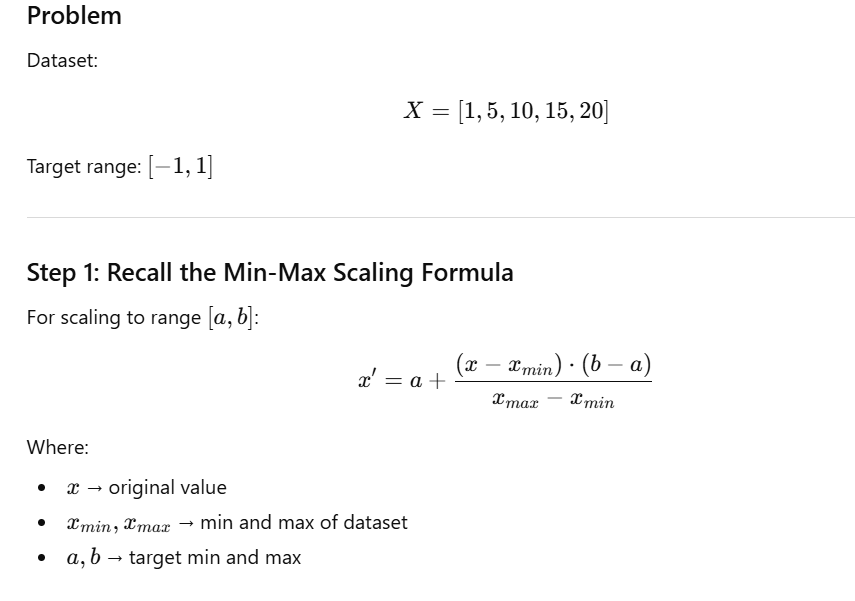

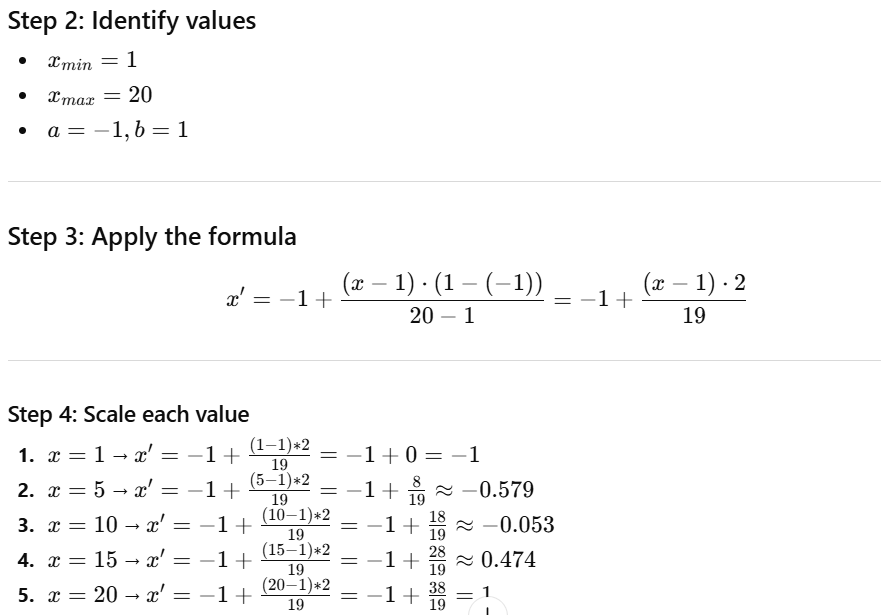


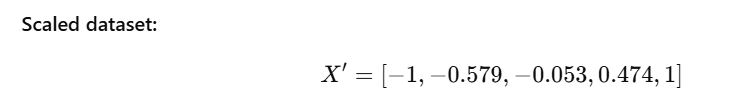

* Conclusion:
All values are now scaled to the range [-1, 1], preserving their relative distances while fitting the target range

In [8]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Original data
X = np.array([[1], [5], [10], [15], [20]])

# Initialize scaler for range [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform
X_scaled = scaler.fit_transform(X)
print(X_scaled)


[[-1.        ]
 [-0.57894737]
 [-0.05263158]
 [ 0.47368421]
 [ 1.        ]]


**Q8.** For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform
Feature Extraction using PCA. How many principal components would you choose to retain, and why?

**Ans:**

## **Problem**

Dataset features:
[
\text{Features} = [\text{height, weight, age, gender, blood pressure}]
]

Goal: Perform **Feature Extraction using PCA**.

---

## **Step 1: Preprocessing**

1. **Separate numerical and categorical features**

   * Numerical: height, weight, age, blood pressure
   * Categorical: gender → encode to numeric (e.g., Male=0, Female=1)

2. **Standardize numerical features**

   * PCA is sensitive to scale, so all features should be standardized to mean=0, std=1

---

## **Step 2: Apply PCA**

* PCA transforms the original features into **principal components (PCs)**
* Each PC is a **linear combination of the original features**
* PCs are **uncorrelated** and capture **maximum variance**

---

## **Step 3: Choosing the Number of Principal Components**

**Rule of Thumb:**

* Retain enough PCs to explain **~90–95% of the total variance**
* In the example:

| PC  | Explained Variance |
| --- | ------------------ |
| PC1 | 60%                |
| PC2 | 20%                |
| PC3 | 10%                |
| PC4 | 6%                 |
| PC5 | 4%                 |

* **Cumulative variance for first 3 PCs = 60% + 20% + 10% = 90%**
* Therefore, **retain 3 principal components**

**Reason:**

* Reduces dimensionality from 5 → 3 features
* Keeps **most of the information**
* Simplifies the model and reduces noise

---

## **Step 4: Using Principal Components**

* PCs can be used as **new features** in ML models (regression, classification, clustering)
* Benefits:

  1. Fewer features → faster computation
  2. Removes multicollinearity
  3. Focuses on most informative aspects of the dataset

---

✅ **Conclusion:**

* Use **PCA** to transform `[height, weight, age, gender, blood pressure]` into **3 principal components**
* These PCs capture **90% of the variance**, making them suitable for predictive modeling



In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Sample dataset
data = pd.DataFrame({
    'height': [160, 170, 165, 180, 175],
    'weight': [60, 72, 65, 80, 75],
    'age': [25, 30, 28, 35, 32],
    'gender': [0, 1, 0, 1, 0],  # 0=Male, 1=Female
    'blood_pressure': [120, 130, 125, 140, 135]
})

# Step 1: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 3: Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [8.81366589e-01 1.16643063e-01 1.64721618e-03 3.43131761e-04
 4.71285550e-34]
